# Multiple Linear Regression Assignment

## Bike Sharing Case study

### Step1 : Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [73]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
bike.shape

(730, 16)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [75]:
# Dropping casual and registered columns
bike = bike.drop(['casual', 'registered'], axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [76]:
bike.shape

(730, 14)

In [48]:
#weekday data
bike.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [69]:
#workingday data
bike.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [70]:
#weathersit 
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [80]:
# renaming columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [52]:
# Drop the duplicate data
bike.drop_duplicates(inplace=True)
bike.shape

(730, 14)

In [78]:
#mapping season column to understand data better

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [81]:
#mapping month column to understand data better

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [82]:
#mapping weekday column to understand data better
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [84]:
#mapping weathersit column to understand data better

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'LightRainSnow'})

In [121]:
#mapping year column to understand data better
bike.year = bike.year.map({0:2018,1:2019})

In [90]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,01-01-2018,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualizing the data

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

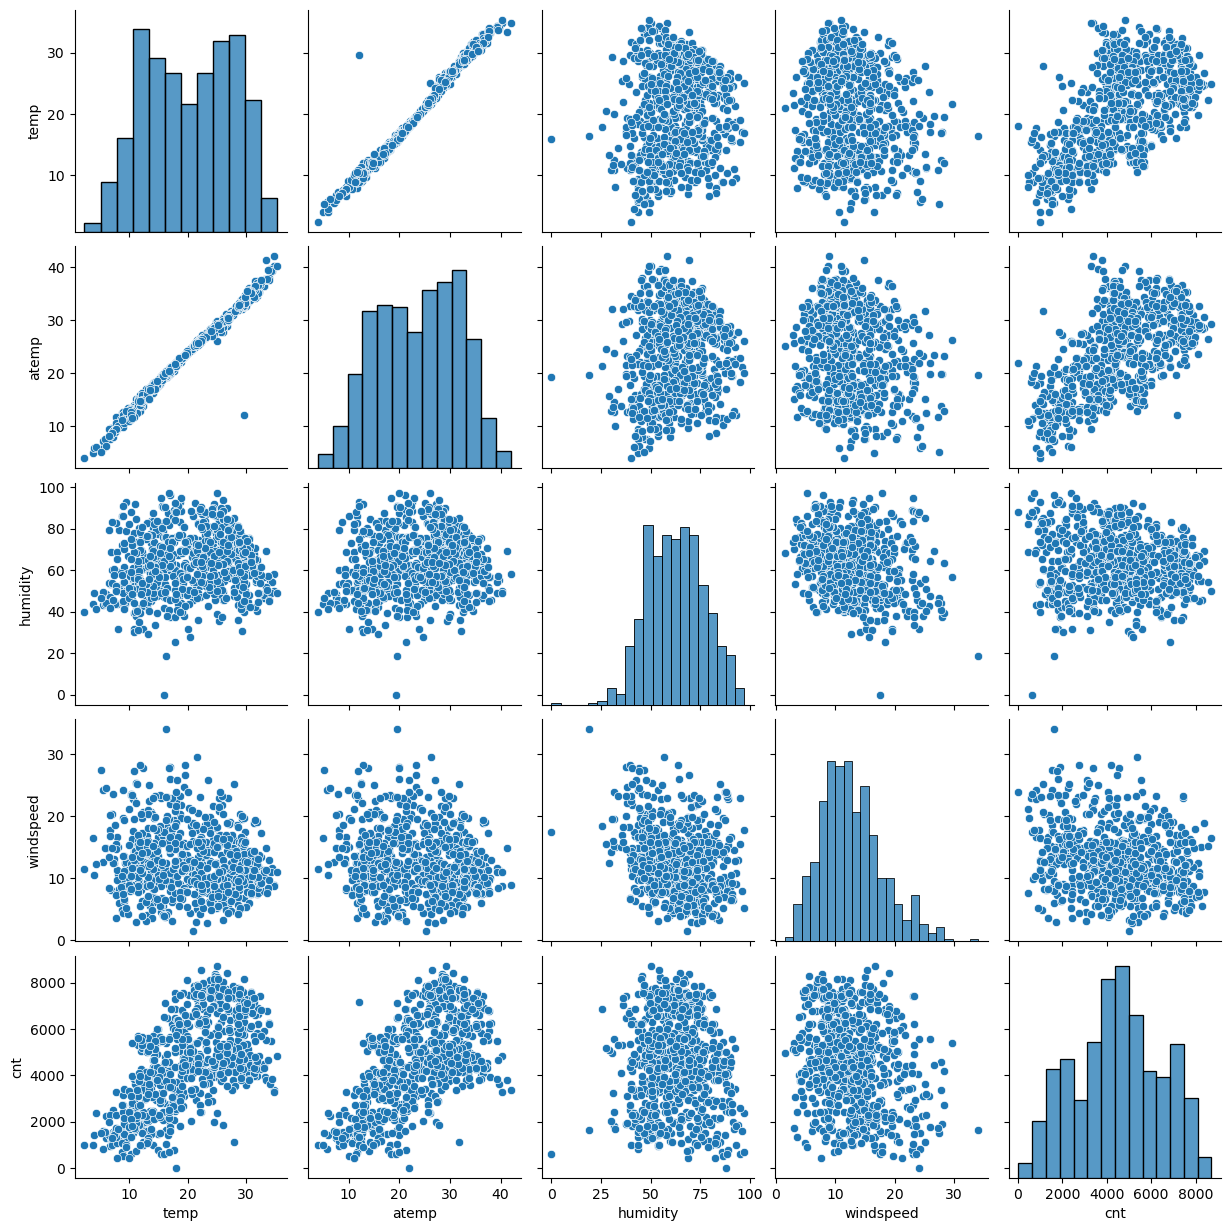

In [108]:
#pairplot to have high level overview of numerical data
sns.pairplot(bike, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

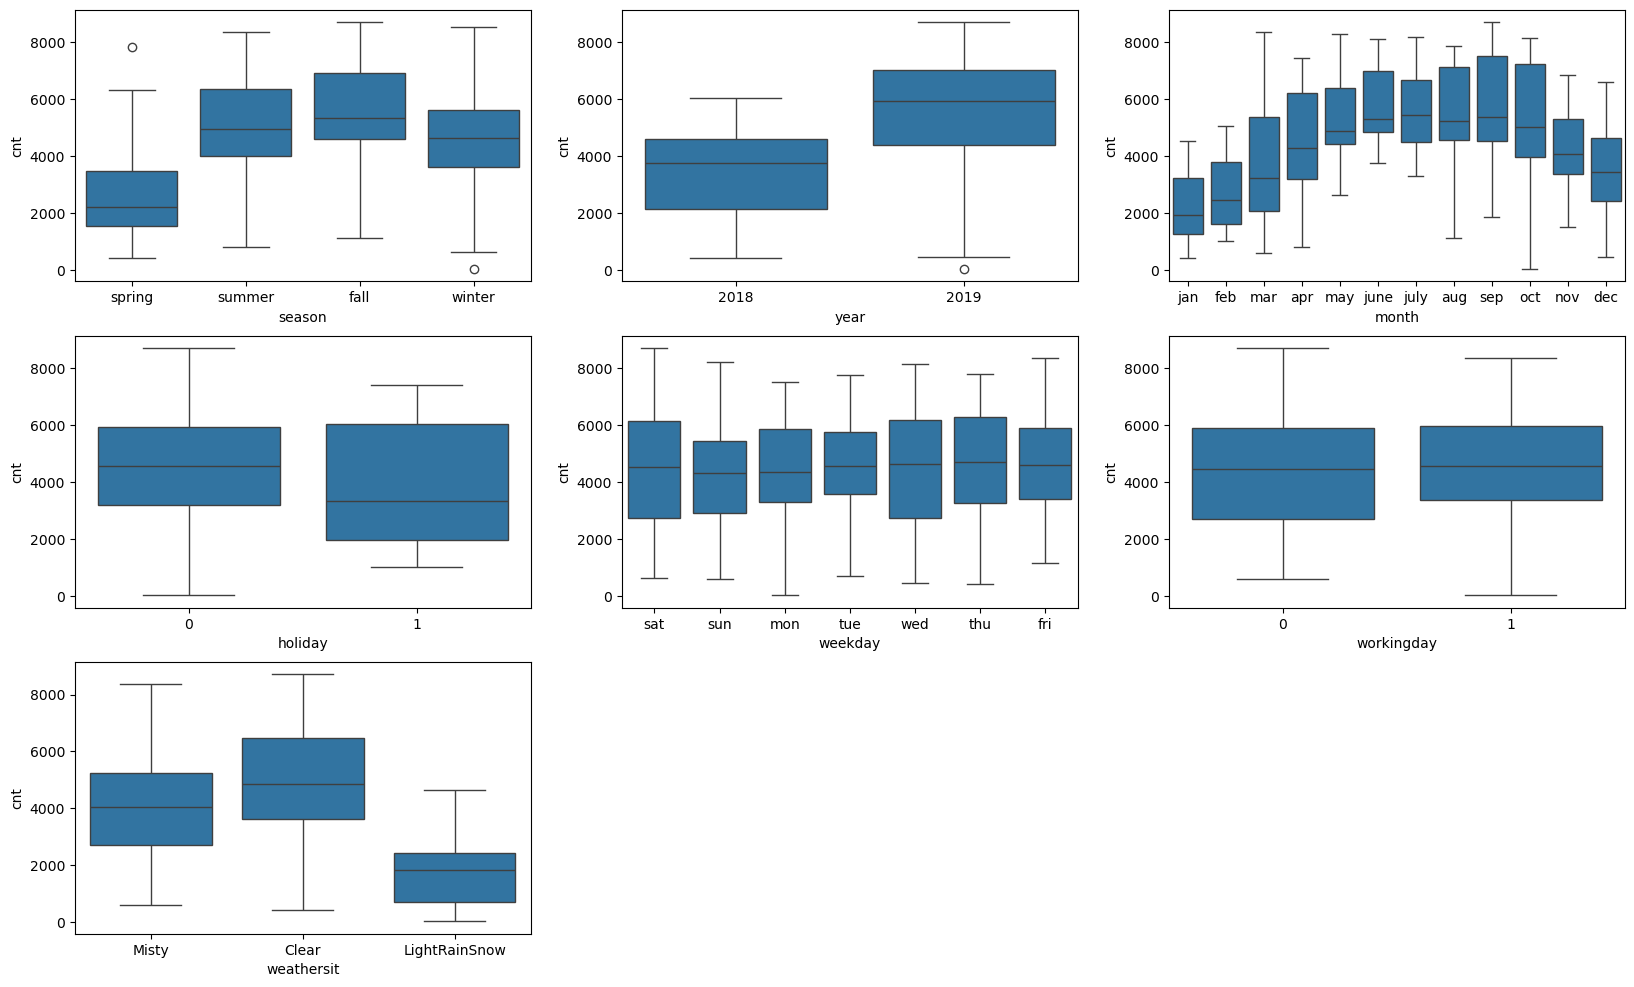

In [92]:
#Visualizing categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Plotting graphs for categorical variables with in combination of others

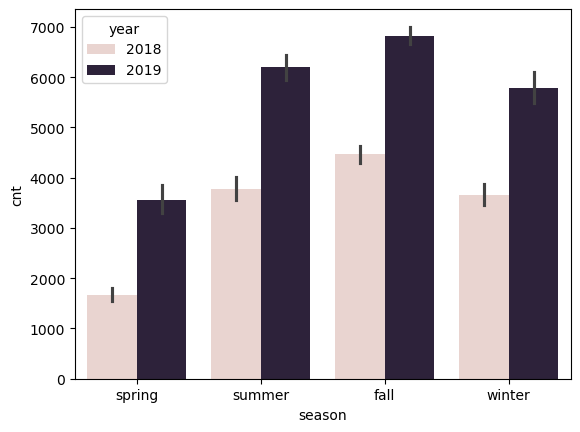

In [98]:
#Data across years wrt season
sns.barplot(x='season',y='cnt', data=bike, hue='year')
plt.show()

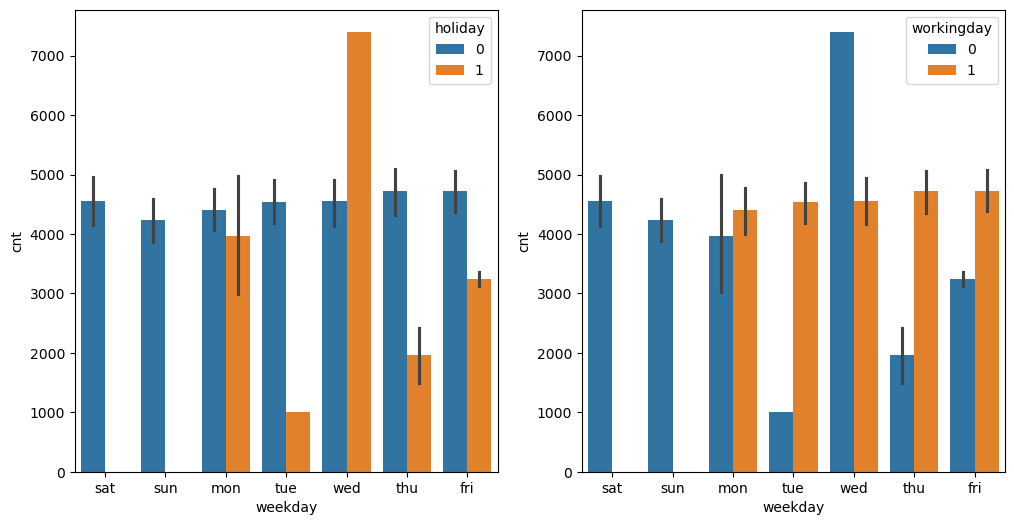

In [106]:
#Data for weekdays wrt holidays and workingdays
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt', data=bike, hue='holiday')
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt', data=bike, hue='workingday')
plt.show()

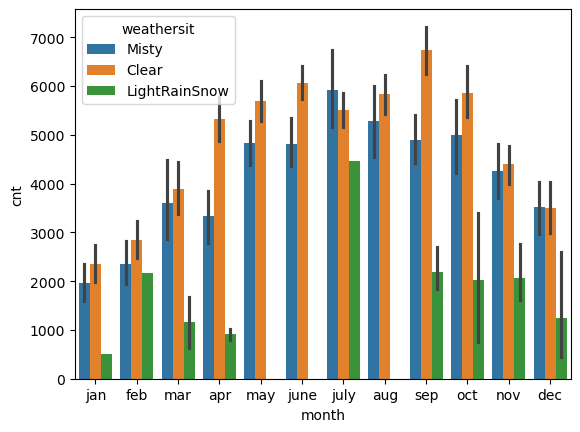

In [109]:
#Per Month Data wrt weather
sns.barplot(x='month',y='cnt', data=bike, hue='weathersit')
plt.show()

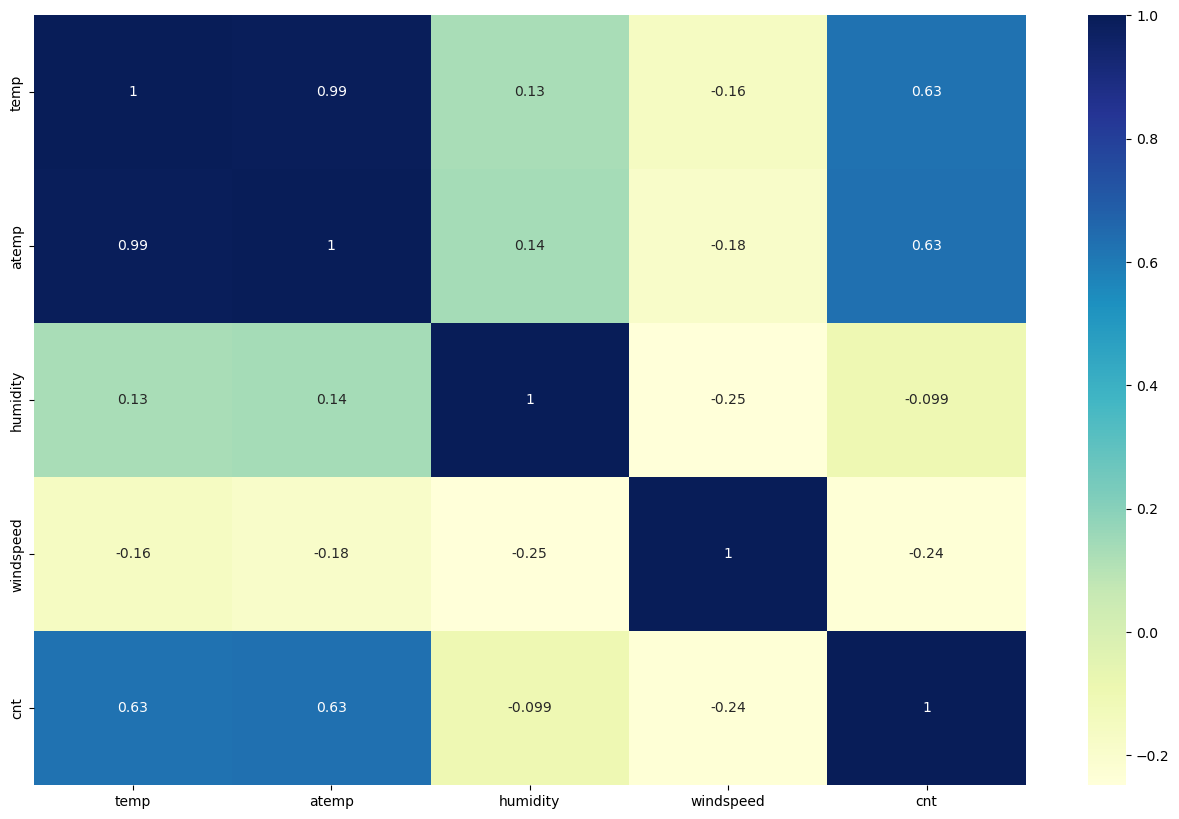

In [111]:
# Let's check the correlation coefficients to see which numerical variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 3 : Data Preperation

In [114]:
#Need to convert categorical variables to dummy variables

weekdays_data=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_data=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_data=pd.get_dummies(bike.season,drop_first=True)
months_data=pd.get_dummies(bike.month,drop_first=True)

In [130]:
#Merging the data with dummy variables data sets

bike_new = pd.concat([bike,weekdays_data,weathersit_data,seasons_data,months_data],axis=1)

In [131]:
bike_new.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1,01-01-2018,spring,2018,jan,0,sat,0,Misty,14.110847,...,False,False,True,False,False,False,False,False,False,False
1,2,02-01-2018,spring,2018,jan,0,sun,0,Misty,14.902598,...,False,False,True,False,False,False,False,False,False,False
2,3,03-01-2018,spring,2018,jan,0,mon,1,Clear,8.050924,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,spring,2018,jan,0,tue,1,Clear,8.200000,...,False,False,True,False,False,False,False,False,False,False
4,5,05-01-2018,spring,2018,jan,0,wed,1,Clear,9.305237,...,False,False,True,False,False,False,False,False,False,False


In [132]:
#Converting year back to 0 and 1
bike_new.year = bike_new.year.map({2018:0, 2019:1})
bike_new.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,...,False,False,True,False,False,False,False,False,False,False
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,...,False,False,True,False,False,False,False,False,False,False
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,...,False,False,True,False,False,False,False,False,False,False
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,...,False,False,True,False,False,False,False,False,False,False


In [133]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   dteday         730 non-null    object 
 2   season         730 non-null    object 
 3   year           730 non-null    int64  
 4   month          730 non-null    object 
 5   holiday        730 non-null    int64  
 6   weekday        730 non-null    object 
 7   workingday     730 non-null    int64  
 8   weathersit     730 non-null    object 
 9   temp           730 non-null    float64
 10  atemp          730 non-null    float64
 11  humidity       730 non-null    float64
 12  windspeed      730 non-null    float64
 13  cnt            730 non-null    int64  
 14  mon            730 non-null    bool   
 15  sat            730 non-null    bool   
 16  sun            730 non-null    bool   
 17  thu            730 non-null    bool   
 18  tue       

In [134]:
#Dropping the columns for which dummies are created.
bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_new.head()

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,False,False,True,False,False,False,False,False,False,False
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,False,False,True,False,False,False,False,False,False,False
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,False,False,True,False,False,False,False,False,False,False
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,False,False,True,False,False,False,False,False,False,False


In [135]:
bike_new.shape

(730, 32)

In [137]:
#Droping instant as its an index and dteday columns as well, as they not useful
bike_new = bike_new.drop(['instant', 'dteday'], axis=1)
bike_new.shape

(730, 30)

### Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [142]:
df_train.shape

(510, 30)

In [143]:
df_test.shape

(219, 30)

In [144]:
#Resclaing the features using MinMaxScalars
scaler = MinMaxScaler()


In [145]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [146]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,False,False,False,False,False,False,False,False,True,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,True,...,False,False,False,False,False,True,False,False,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,False,...,True,False,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,...,False,False,False,False,False,False,False,False,False,False


In [147]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


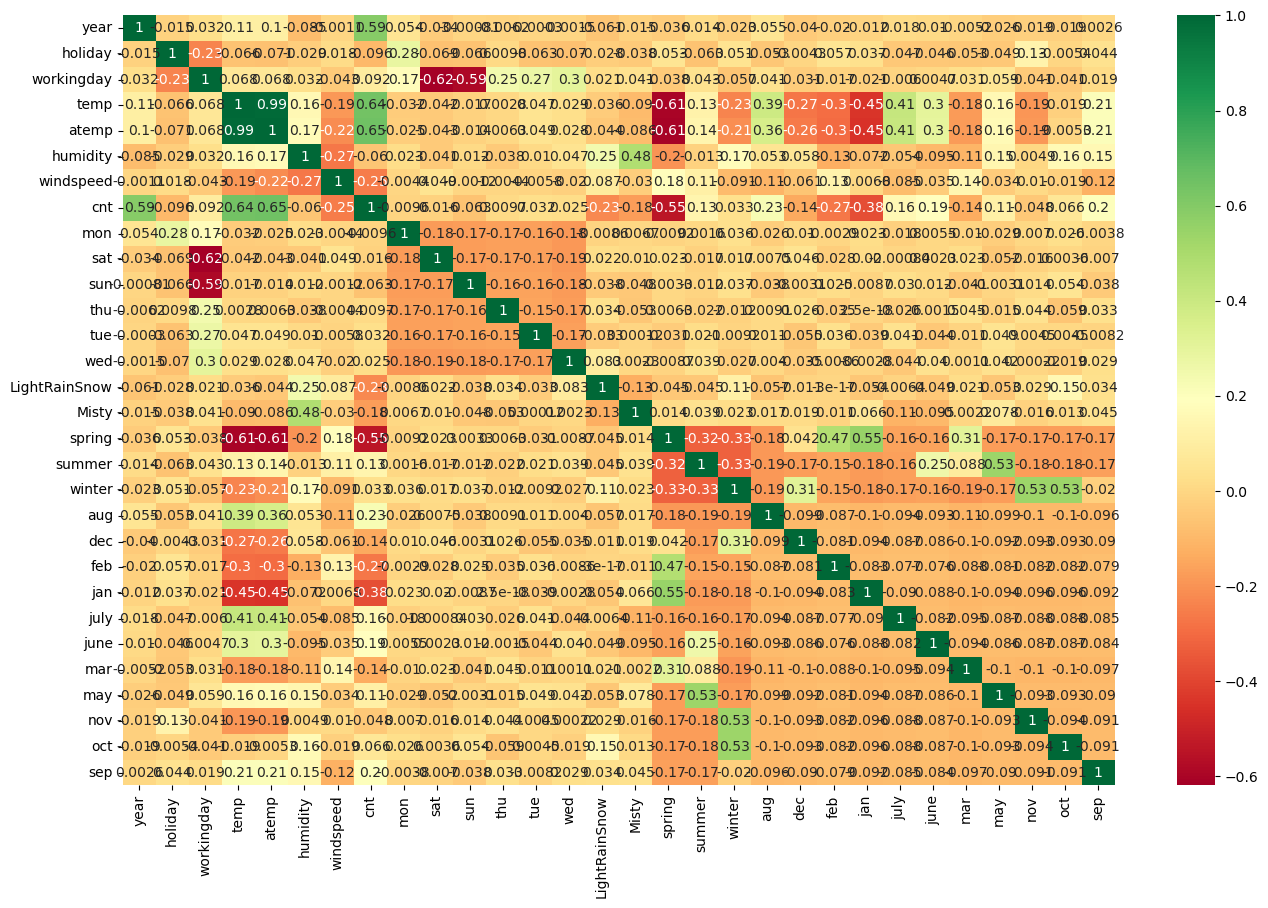

In [148]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

Correlations from above graph:

1. Cnt  ->  year , temp, atemp, spring
2. spring  -> jan, feb, temp, atemp, cnt
3. summer -> may
4. winter -> nov, oct


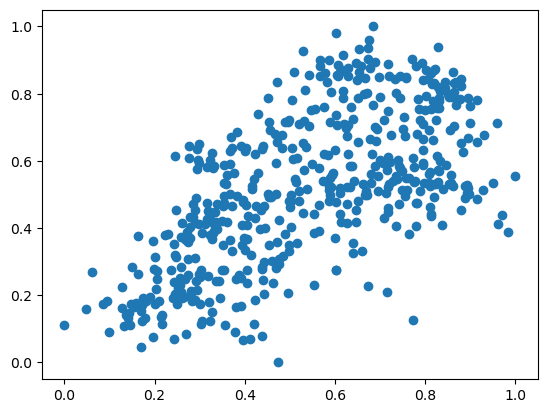

In [153]:
# Visualizing one of the correlation to see the trends using Scatter plot.

plt.scatter(df_train.temp, df_train.cnt)
plt.show()

temp and cnt have positive correlation as confirmed from heat map and scatter plot

In [154]:
#Start to build the model

y_train = df_train.pop('cnt')
X_train = df_train

In [157]:
# RFE:  Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [158]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 7),
 ('tue', False, 5),
 ('wed', False, 8),
 ('LightRainSnow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 10),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1)]

In [159]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'sat', 'LightRainSnow', 'Misty', 'spring', 'summer',
       'winter', 'dec', 'feb', 'jan', 'july', 'may', 'nov', 'sep'],
      dtype='object')

In [160]:
X_train.columns[~rfe.support_]

Index(['mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'june', 'mar', 'oct'], dtype='object')

###  Step 5: Building model using statsmodel, for the detailed statistics

In [225]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [226]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [227]:
lm = sm.OLS(y_train,X_train_lm1.astype(float)).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.94e-188
Time:                        17:37:44   Log-Likelihood:                 526.26
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2987      0.038      7.768      0.000       0.223       0.374
year              0.2317      0.008     29.121      0.000       0.216       0.247
holiday          -0.0489      0.027     -1.816      0.070      -0.102       0.004
workingday        0.0442      0.011      3.865      0.000       0.022       0.067
temp              0.4261      0.133      3.195      0.001       0.164       0.688
atemp             0.0253      0.135      0.187      0.852      -0.240       0.290
humidity         -0.1525      0.038     -4.055      0.000      -0.226      -0.079
windspeed        -0.1859      0.026     -7.181      0.000      -0.237      -0.135
sat               0.0547      0.014      3.794      0.000       0.026       0.083
LightRainSnow    -0.2560      0.026     -9.798      0.000      -0.307      -0.205
Misty            -0.0599      0.010     -5.794      0.000      -0.080      -0.040
spring           -0.0566      0.022     -2.561      0.011      -0.100      -0.013
summer            0.0263      0.017      1.526      0.128      -0.008       0.060
winter            0.1005      0.018      5.564      0.000       0.065       0.136
dec              -0.0507      0.018     -2.807      0.005      -0.086      -0.015
feb              -0.0354      0.021     -1.659      0.098      -0.077       0.007
jan              -0.0657      0.021     -3.100      0.002      -0.107      -0.024
july             -0.0514      0.018     -2.861      0.004      -0.087      -0.016
may               0.0251      0.017      1.453      0.147      -0.009       0.059
nov              -0.0484      0.019     -2.592      0.010      -0.085      -0.012
sep               0.0715      0.017      4.298      0.000       0.039       0.104
==============================================================================
Omnibus:                       84.497   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.277
Skew:                          -0.794   Prob(JB):                     2.46e-53
Kurtosis:                       5.979   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since atemp has highest p value, dropping it 

In [228]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [229]:
#Second Model

X_train_lm2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm2.astype(float)).fit()   # Running the linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.59e-189
Time:                        17:38:02   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2985      0.038      7.774      0.000       0.223       0.374
year              0.2317      0.008     29.150      0.000       0.216       0.247
holiday          -0.0491      0.027     -1.827      0.068      -0.102       0.004
workingday        0.0442      0.011      3.868      0.000       0.022       0.067
temp              0.4500      0.038     11.796      0.000       0.375       0.525
humidity         -0.1521      0.038     -4.055      0.000      -0.226      -0.078
windspeed        -0.1868      0.025     -7.365      0.000      -0.237      -0.137
sat               0.0547      0.014      3.796      0.000       0.026       0.083
LightRainSnow    -0.2564      0.026     -9.847      0.000      -0.308      -0.205
Misty            -0.0599      0.010     -5.807      0.000      -0.080      -0.040
spring           -0.0560      0.022     -2.563      0.011      -0.099      -0.013
summer            0.0269      0.017      1.593      0.112      -0.006       0.060
winter            0.1012      0.018      5.705      0.000       0.066       0.136
dec              -0.0506      0.018     -2.807      0.005      -0.086      -0.015
feb              -0.0355      0.021     -1.661      0.097      -0.077       0.006
jan              -0.0658      0.021     -3.110      0.002      -0.107      -0.024
july             -0.0512      0.018     -2.858      0.004      -0.086      -0.016
may               0.0250      0.017      1.449      0.148      -0.009       0.059
nov              -0.0483      0.019     -2.592      0.010      -0.085      -0.012
sep               0.0718      0.017      4.324      0.000       0.039       0.104
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
#VIF calculation routine
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vifCalculate(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [199]:
vifCalculate(X_train_new.astype(float))

,Features,VIF
4,humidity,31.79
3,temp,19.84
9,spring,5.62
2,workingday,5.39
5,windspeed,4.88
11,winter,4.12
10,summer,3.43
14,jan,2.40
8,Misty,2.33
0,year,2.10


In [231]:
#humidity has the highest VIF, dropping it.
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
3,temp,7.46
2,workingday,5.36
4,windspeed,4.82
8,spring,4.57
10,winter,3.07
9,summer,2.91
13,jan,2.24
0,year,2.09
5,sat,2.00
12,feb,1.89


In [201]:
#Third Model

X_train_lm3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm3.astype(float)).fit()   # Running the linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.94e-187
Time:                        17:16:58   Log-Likelihood:                 517.83
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     491   BIC:                            -917.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2240      0.034      6.542      0.000       0.157       0.291
year              0.2353      0.008     29.322      0.000       0.220       0.251
holiday          -0.0470      0.027     -1.724      0.085      -0.101       0.007
workingday        0.0472      0.012      4.080      0.000       0.024       0.070
temp              0.4126      0.038     10.974      0.000       0.339       0.486
windspeed        -0.1599      0.025     -6.431      0.000      -0.209      -0.111
sat               0.0593      0.015      4.066      0.000       0.031       0.088
LightRainSnow    -0.2994      0.024    -12.397      0.000      -0.347      -0.252
Misty            -0.0840      0.009     -9.806      0.000      -0.101      -0.067
spring           -0.0630      0.022     -2.848      0.005      -0.106      -0.020
summer            0.0234      0.017      1.364      0.173      -0.010       0.057
winter            0.0882      0.018      4.979      0.000       0.053       0.123
dec              -0.0579      0.018     -3.176      0.002      -0.094      -0.022
feb              -0.0376      0.022     -1.735      0.083      -0.080       0.005
jan              -0.0728      0.021     -3.400      0.001      -0.115      -0.031
july             -0.0464      0.018     -2.554      0.011      -0.082      -0.011
may               0.0166      0.017      0.951      0.342      -0.018       0.051
nov              -0.0490      0.019     -2.586      0.010      -0.086      -0.012
sep               0.0653      0.017      3.893      0.000       0.032       0.098
==============================================================================
Omnibus:                       87.227   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.230
Skew:                          -0.816   Prob(JB):                     1.03e-55
Kurtosis:                       6.042   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
#Since "may" has highest P value, dropping from the list
X_train_new = X_train_new.drop(['may'], axis = 1)


In [233]:
# Fourth Model
X_train_lm4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm4.astype(float)).fit()   # Running the linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.80e-188
Time:                        17:38:24   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2187      0.034      6.474      0.000       0.152       0.285
year              0.2348      0.008     29.327      0.000       0.219       0.250
holiday          -0.0477      0.027     -1.747      0.081      -0.101       0.006
workingday        0.0472      0.012      4.082      0.000       0.025       0.070
temp              0.4202      0.037     11.445      0.000       0.348       0.492
windspeed        -0.1619      0.025     -6.537      0.000      -0.211      -0.113
sat               0.0588      0.015      4.038      0.000       0.030       0.087
LightRainSnow    -0.2995      0.024    -12.400      0.000      -0.347      -0.252
Misty            -0.0834      0.009     -9.763      0.000      -0.100      -0.067
spring           -0.0600      0.022     -2.741      0.006      -0.103      -0.017
summer            0.0307      0.015      2.008      0.045       0.001       0.061
winter            0.0901      0.018      5.121      0.000       0.056       0.125
dec              -0.0567      0.018     -3.118      0.002      -0.092      -0.021
feb              -0.0365      0.022     -1.688      0.092      -0.079       0.006
jan              -0.0714      0.021     -3.342      0.001      -0.113      -0.029
july             -0.0468      0.018     -2.582      0.010      -0.082      -0.011
nov              -0.0477      0.019     -2.527      0.012      -0.085      -0.011
sep               0.0655      0.017      3.905      0.000       0.033       0.098
==============================================================================
Omnibus:                       85.173   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.529
Skew:                          -0.810   Prob(JB):                     2.64e-52
Kurtosis:                       5.925   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
#Since "feb" has next highest P value dropping it 
X_train_new = X_train_new.drop(['feb'], axis = 1)


In [206]:
# Fifth Model
X_train_lm5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm5.astype(float)).fit()   # Running the linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.49e-188
Time:                        17:20:34   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2055      0.033      6.242      0.000       0.141       0.270
year              0.2345      0.008     29.241      0.000       0.219       0.250
holiday          -0.0499      0.027     -1.827      0.068      -0.104       0.004
workingday        0.0475      0.012      4.096      0.000       0.025       0.070
temp              0.4360      0.036     12.254      0.000       0.366       0.506
windspeed        -0.1604      0.025     -6.467      0.000      -0.209      -0.112
sat               0.0598      0.015      4.097      0.000       0.031       0.088
LightRainSnow    -0.2987      0.024    -12.347      0.000      -0.346      -0.251
Misty            -0.0834      0.009     -9.751      0.000      -0.100      -0.067
spring           -0.0701      0.021     -3.327      0.001      -0.112      -0.029
summer            0.0340      0.015      2.237      0.026       0.004       0.064
winter            0.0917      0.018      5.212      0.000       0.057       0.126
dec              -0.0474      0.017     -2.731      0.007      -0.082      -0.013
jan              -0.0520      0.018     -2.882      0.004      -0.087      -0.017
july             -0.0478      0.018     -2.630      0.009      -0.083      -0.012
nov              -0.0429      0.019     -2.291      0.022      -0.080      -0.006
sep               0.0669      0.017      3.989      0.000       0.034       0.100
==============================================================================
Omnibus:                       80.436   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.289
Skew:                          -0.770   Prob(JB):                     8.87e-49
Kurtosis:                       5.836   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
3,temp,7.21
2,workingday,5.33
4,windspeed,4.72
8,spring,3.17
10,winter,3.03
9,summer,2.33
0,year,2.08
5,sat,1.99
14,nov,1.81
12,jan,1.68


In [236]:
#Dropping holiday as it has next highest P value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

In [237]:
# Sixth Model
X_train_lm6 = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm6.astype(float)).fit()   # Running the linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.71e-189
Time:                        17:38:38   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1999      0.033      6.084      0.000       0.135       0.264
year              0.2346      0.008     29.196      0.000       0.219       0.250
workingday        0.0548      0.011      5.027      0.000       0.033       0.076
temp              0.4344      0.036     12.184      0.000       0.364       0.504
windspeed        -0.1610      0.025     -6.479      0.000      -0.210      -0.112
sat               0.0671      0.014      4.777      0.000       0.040       0.095
LightRainSnow    -0.2980      0.024    -12.291      0.000      -0.346      -0.250
Misty            -0.0831      0.009     -9.686      0.000      -0.100      -0.066
spring           -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer            0.0338      0.015      2.219      0.027       0.004       0.064
winter            0.0919      0.018      5.209      0.000       0.057       0.127
dec              -0.0483      0.017     -2.778      0.006      -0.083      -0.014
jan              -0.0528      0.018     -2.924      0.004      -0.088      -0.017
july             -0.0469      0.018     -2.575      0.010      -0.083      -0.011
nov              -0.0469      0.019     -2.518      0.012      -0.083      -0.010
sep               0.0648      0.017      3.859      0.000       0.032       0.098
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
7,spring,3.09
9,winter,3.02
8,summer,2.32
0,year,2.08
4,sat,1.86
13,nov,1.78
11,jan,1.67


In [239]:
#Dropping "summer" as it has next highest p value
X_train_new = X_train_new.drop(['summer'], axis = 1)


In [212]:
# Seventh  Model
X_train_lm7 = sm.add_constant(X_train_new)
lm_7 = sm.OLS(y_train,X_train_lm7.astype(float)).fit()   # Running the linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.64e-189
Time:                        17:25:41   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2436      0.026      9.221      0.000       0.192       0.295
year              0.2351      0.008     29.157      0.000       0.219       0.251
workingday        0.0545      0.011      4.982      0.000       0.033       0.076
temp              0.3988      0.032     12.479      0.000       0.336       0.462
windspeed        -0.1563      0.025     -6.288      0.000      -0.205      -0.107
sat               0.0667      0.014      4.727      0.000       0.039       0.094
LightRainSnow    -0.3000      0.024    -12.334      0.000      -0.348      -0.252
Misty            -0.0828      0.009     -9.618      0.000      -0.100      -0.066
spring           -0.1039      0.015     -6.760      0.000      -0.134      -0.074
winter            0.0678      0.014      4.857      0.000       0.040       0.095
dec              -0.0549      0.017     -3.187      0.002      -0.089      -0.021
jan              -0.0583      0.018     -3.241      0.001      -0.094      -0.023
july             -0.0611      0.017     -3.571      0.000      -0.095      -0.027
nov              -0.0539      0.018     -2.929      0.004      -0.090      -0.018
sep               0.0500      0.015      3.233      0.001       0.020       0.080
==============================================================================
Omnibus:                       86.091   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.790
Skew:                          -0.796   Prob(JB):                     1.73e-56
Kurtosis:                       6.090   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
2,temp,6.72
1,workingday,4.56
3,windspeed,4.17
8,winter,2.56
7,spring,2.45
0,year,2.07
4,sat,1.82
12,nov,1.77
10,jan,1.67
6,Misty,1.55


In [241]:
#Dropping "nov" 
X_train_new = X_train_new.drop(['nov'], axis = 1)


In [242]:
# Eighth  Model
X_train_lm8 = sm.add_constant(X_train_new)
lm_8 = sm.OLS(y_train,X_train_lm8.astype(float)).fit()   # Running the linear model
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.21e-188
Time:                        17:38:59   Log-Likelihood:                 507.25
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     496   BIC:                            -927.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2291      0.026      8.762      0.000       0.178       0.280
year              0.2351      0.008     28.936      0.000       0.219       0.251
workingday        0.0552      0.011      5.009      0.000       0.034       0.077
temp              0.4180      0.032     13.267      0.000       0.356       0.480
windspeed        -0.1567      0.025     -6.256      0.000      -0.206      -0.107
sat               0.0679      0.014      4.779      0.000       0.040       0.096
LightRainSnow    -0.2948      0.024    -12.061      0.000      -0.343      -0.247
Misty            -0.0816      0.009     -9.422      0.000      -0.099      -0.065
spring           -0.1001      0.015     -6.486      0.000      -0.130      -0.070
winter            0.0491      0.013      3.924      0.000       0.024       0.074
dec              -0.0360      0.016     -2.238      0.026      -0.068      -0.004
jan              -0.0527      0.018     -2.928      0.004      -0.088      -0.017
july             -0.0640      0.017     -3.721      0.000      -0.098      -0.030
sep               0.0539      0.016      3.473      0.001       0.023       0.084
==============================================================================
Omnibus:                       79.306   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.584
Skew:                          -0.754   Prob(JB):                     7.65e-49
Kurtosis:                       5.855   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
2,temp,6.67
1,workingday,4.55
3,windspeed,4.13
7,spring,2.45
0,year,2.07
4,sat,1.82
8,winter,1.66
10,jan,1.66
6,Misty,1.55
11,july,1.37


In [244]:
#Dropping "dec" 
X_train_new = X_train_new.drop(['dec'], axis = 1)


In [218]:
# Ninth  Model
X_train_lm9 = sm.add_constant(X_train_new)
lm_9 = sm.OLS(y_train,X_train_lm9.astype(float)).fit()   # Running the linear model
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.76e-188
Time:                        17:28:57   Log-Likelihood:                 504.69
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     497   BIC:                            -928.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2180      0.026      8.458      0.000       0.167       0.269
year              0.2352      0.008     28.830      0.000       0.219       0.251
workingday        0.0545      0.011      4.923      0.000       0.033       0.076
temp              0.4323      0.031     13.954      0.000       0.371       0.493
windspeed        -0.1503      0.025     -6.016      0.000      -0.199      -0.101
sat               0.0663      0.014      4.651      0.000       0.038       0.094
LightRainSnow    -0.2918      0.025    -11.909      0.000      -0.340      -0.244
Misty            -0.0816      0.009     -9.374      0.000      -0.099      -0.064
spring           -0.1018      0.015     -6.577      0.000      -0.132      -0.071
winter            0.0438      0.012      3.553      0.000       0.020       0.068
jan              -0.0444      0.018     -2.508      0.012      -0.079      -0.010
july             -0.0664      0.017     -3.848      0.000      -0.100      -0.032
sep               0.0552      0.016      3.543      0.000       0.025       0.086
==============================================================================
Omnibus:                       72.064   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.202
Skew:                          -0.703   Prob(JB):                     3.03e-42
Kurtosis:                       5.650   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
2,temp,6.62
1,workingday,4.50
3,windspeed,4.12
7,spring,2.36
0,year,2.07
4,sat,1.80
9,jan,1.61
6,Misty,1.55
8,winter,1.45
10,july,1.37


In [246]:
#Dropping "dec" 
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [221]:
# Tenth  Model
X_train_lm10 = sm.add_constant(X_train_new)
lm_10 = sm.OLS(y_train,X_train_lm10.astype(float)).fit()   # Running the linear model
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.53e-188
Time:                        17:30:17   Log-Likelihood:                 501.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2038      0.025      8.062      0.000       0.154       0.253
year              0.2344      0.008     28.604      0.000       0.218       0.251
workingday        0.0543      0.011      4.883      0.000       0.032       0.076
temp              0.4510      0.030     14.920      0.000       0.392       0.510
windspeed        -0.1415      0.025     -5.691      0.000      -0.190      -0.093
sat               0.0659      0.014      4.600      0.000       0.038       0.094
LightRainSnow    -0.2904      0.025    -11.793      0.000      -0.339      -0.242
Misty            -0.0825      0.009     -9.445      0.000      -0.100      -0.065
spring           -0.1117      0.015     -7.419      0.000      -0.141      -0.082
winter            0.0480      0.012      3.907      0.000       0.024       0.072
july             -0.0699      0.017     -4.048      0.000      -0.104      -0.036
sep               0.0542      0.016      3.460      0.001       0.023       0.085
==============================================================================
Omnibus:                       70.386   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.520
Skew:                          -0.685   Prob(JB):                     1.91e-41
Kurtosis:                       5.635   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# re-run VIF calculation
vifCalculate(X_train_new.astype(float))

,Features,VIF
2,temp,6.54
1,workingday,4.47
3,windspeed,4.11
0,year,2.06
7,spring,1.81
4,sat,1.79
6,Misty,1.54
8,winter,1.45
9,july,1.36
10,sep,1.20


In [252]:
lm_10.params

const            0.203763
year             0.234436
workingday       0.054329
temp             0.450991
windspeed       -0.141537
sat              0.065883
LightRainSnow   -0.290446
Misty           -0.082523
spring          -0.111664
winter           0.047970
july            -0.069941
sep              0.054164
dtype: float64

***Above model can be considered as it has low multicoliearity between the predictors.***

***Prob(F-statistics) is 2.53e-188 which is almost equal to 0, which states overal model is significant.***

### Step 6: Residual Analysis of train data and validation

In [254]:
y_train_pred = lm_10.predict(X_train_lm10)

#### Normality of error terms

Text(0.5, 0, 'Errors')

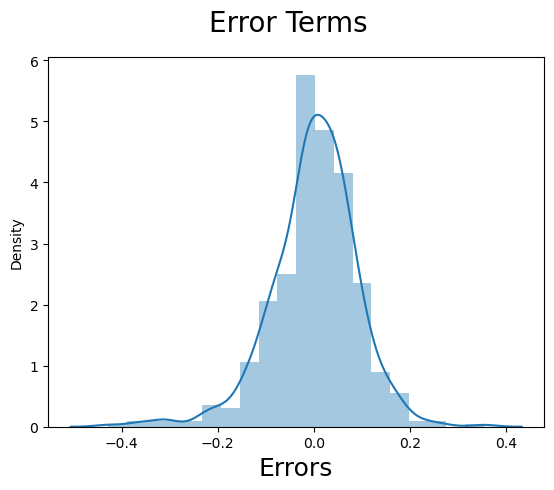

In [255]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

##### Multi Colinearity

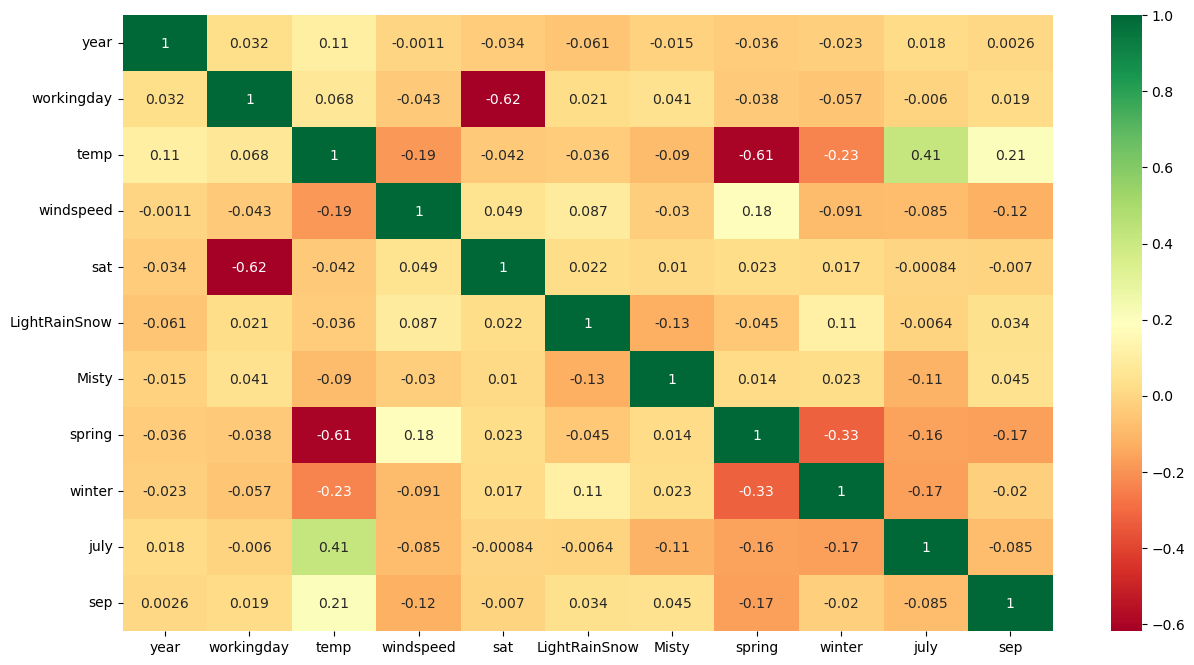

In [257]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Homoscedasticity

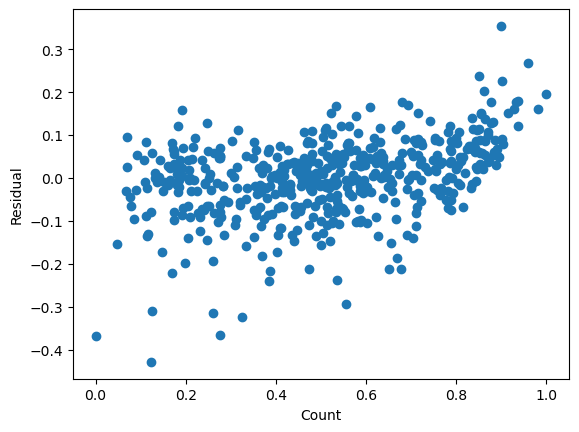

In [264]:
residual = y_train - y_train_pred
plt.scatter(y_train,residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.



#### Linearity

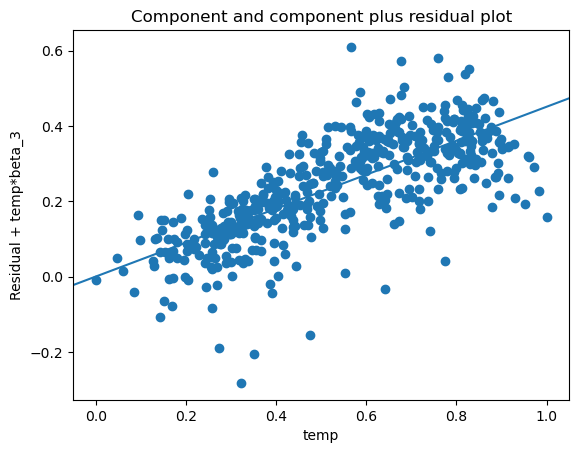

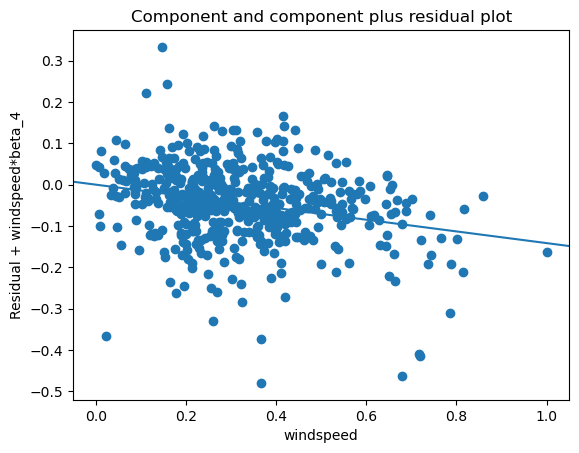

In [282]:
# Linear relationship validation 

sm.graphics.plot_ccpr(lm_10, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_10, 'windspeed')
plt.show()

### Step 7: Making Predictions Using the Final Model


In [265]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
# For test dataset we need only perform "transform"

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,True,False,...,False,False,False,True,False,False,False,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,False,False,False,False,False,False,True,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,False,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,False,False,True,False,False,False,False,False


In [266]:
df_test.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [267]:
#pop cnt from df_test
y_test = df_test.pop('cnt')


In [268]:
X_test = df_test
col1 = X_train_new.columns
X_test = X_test[col1]

In [272]:
# Adding constant variable to test dataframe
X_test_lm_10 = sm.add_constant(X_test)

y_pred = lm_10.predict(X_test_lm_10)


In [273]:
r2 = r2_score(y_test , y_pred)
round(r2,4)

0.8107

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

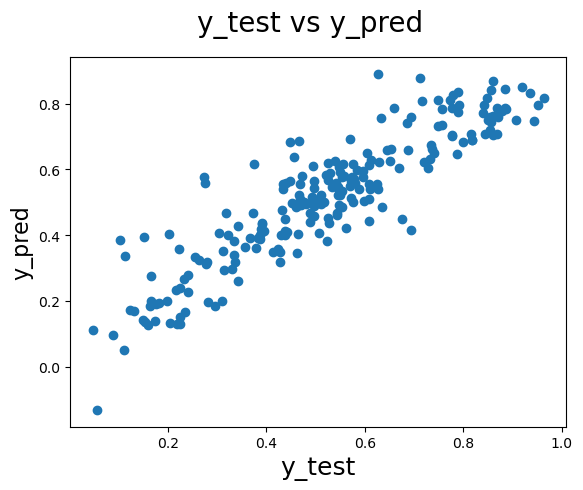

In [274]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [276]:
round(lm_10.params, 4)

const            0.2038
year             0.2344
workingday       0.0543
temp             0.4510
windspeed       -0.1415
sat              0.0659
LightRainSnow   -0.2904
Misty           -0.0825
spring          -0.1117
winter           0.0480
july            -0.0699
sep              0.0542
dtype: float64

***Equation of our best fitted line is :***

***cnt = 0.2038 + 0.2344 x year + 0.0543 x workingday + 0.4510 x temp -0.1415 * windspeed + 0.0659 x sat - 0.2904 x LightRainSnow  - 0.0825 x Misty - 0.1117 x spring + 0.048 x winter - 0.0699 x july + 0.0542 x sep***

In [277]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8006


#### Training vs Testing dataset:

- Train dataset R^2 : 0.837
- Test dataset R^2 : 0.8107
- Train dataset  AdjustedR^2 : 0.834
- Test dataset  AdjustedR^2 : 0.8006

Demand of bikes depend on year, workingday, temp, windspeed, sat, LightRainSnow, Misty, spring, winter, july and sep.